In [1]:
import pandas as pd
import matplotlib.pyplot as plt

*Mengimpor library Pandas untuk manipulasi data dan Matplotlib untuk visualisasi data*

In [14]:
# baca dataset
df = pd.read_csv('R04_corruptions.csv')
df.sample(5)

,Corruption Perception (X),Government Transparency (Y)
42,2.3,76
37,2.4,75
47,3.3,63
29,4.3,54
14,4.0,56


*Membaca file CSV ('R04_corruptions.csv') ke dalam DataFrame Pandas yang disebut df
*Menampilkan 5 sampel acak dari dataset untuk memberikan gambaran cepat tentang datanya*

In [17]:
# melihat informasi data
df.describe()

,Corruption Perception (X),Government Transparency (Y)
count,55.000000,55.000000
mean,3.307273,64.145455
std,0.784539,9.314302
min,2.000000,50.000000
25%,2.650000,56.000000
50%,3.300000,63.000000
75%,4.000000,71.500000
max,4.500000,82.000000


*Menyajikan statistik deskriptif dari dataset, termasuk count, mean, std (standar deviasi), min, 25%, 50%, 75%, dan max*

In [16]:
# data preprocessing

# cek jumlah data
print(len(df))

# cek jika ada data null atau NaN
df.isnull().sum()

55


Corruption Perception (X)      0
Government Transparency (Y)    0
dtype: int64

*Mengecek nilai null dalam dataset dan mencetak jumlah nilai null untuk setiap kolom*

In [8]:
# hapus jika ada nilai 0
index_names = df[df['Corruption Perception (X)'] == 0].index 
df.drop(index_names, inplace = True) 

*Menghapus baris di mana kolom 'Corruption Perception (X)' memiliki nilai 0*

In [9]:
index_names = df[df['Government Transparency (Y)'] == 0].index 
df.drop(index_names, inplace = True) 

*Secara serupa, menghapus baris di mana kolom 'Government Transparency (Y)' memiliki nilai 0*

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, r2_score

# split data menjadi fitur dan target
X = df.iloc[:, :-1]  
y = df.iloc[:, -1]   

# Bagi data menjadi data train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresi Linear
lr_model = LinearRegression()

# Latih model
lr_model.fit(X_train, y_train)

# Prediksi di data uji
y_pred = lr_model.predict(X_test)

# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

# Print coefficients dan metrik evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')
print(f'Root Mean Squared Error (RMSE): {rmse}')

Mean Squared Error (MSE): 14.373700509640043
R-squared (R2): 0.8525836784483434
Root Mean Squared Error (RMSE): 3.791266346438884


*Membagi dataset menjadi set pelatihan dan pengujian menggunakan fungsi train_test_split dari scikit-learn
Membuat model regresi linear dan melatihnya pada data pelatihan
Memprediksi variabel target ('Government Transparency (Y)') untuk set pengujian
Mengevaluasi kinerja model regresi linear menggunakan metrik seperti Mean Squared Error (MSE), R-squared (R2), dan Root Mean Squared Error (RMSE)
Mencetak metrik evaluasi yang dihitung*

In [19]:
# uji pada data test
df_test = pd.DataFrame({'X': X_test['Corruption Perception (X)'], 'Y': y_test, 'Predicted (Y)': y_pred})
df_test.head(10)

,X,Y,Predicted (Y)
31,2.5,70,73.130378
5,2.4,75,74.254612
32,4.4,53,51.769924
13,2.3,76,75.378847
19,2.1,80,77.627316
49,4.3,54,52.894159
41,3.8,56,58.515331
26,4.2,55,54.018393
43,4.0,52,56.266862
12,3.0,65,67.509206


*Membuat DataFrame (df_test) yang berisi nilai aktual, nilai prediksi, dan 'Corruption Perception (X)' untuk set pengujian dan menampilkan 10 baris pertama*

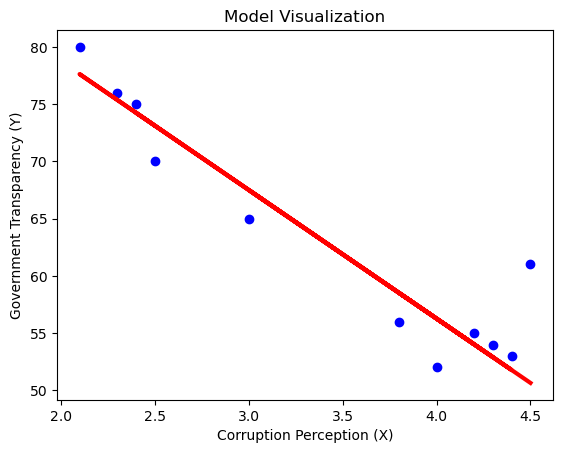

In [11]:
# Plot grafik regresi
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_pred, color='red', linewidth=3)
plt.xlabel('Corruption Perception (X)')
plt.ylabel('Government Transparency (Y)')
plt.title('Model Visualization')
plt.show()

*Membuat plot sebar (scatter plot) dari nilai aktual vs. nilai prediksi dan memvisualisasikan garis regresi. Juga mengatur label untuk sumbu-sumbu dan judul plot, dan terakhir, menampilkan plot tersebut*